In [1]:
conda env list

# conda environments:
#
TimeGPT                  D:\Python\envs\TimeGPT
baichuan                 D:\Python\envs\baichuan
py2                      D:\Python\envs\py2
py310                    D:\Python\envs\py310
so-vits-svc              D:\Python\envs\so-vits-svc
torch                 *  D:\Python\envs\torch
root                     D:\Python


Note: you may need to restart the kernel to use updated packages.


# 背景介绍
本次活动参赛选手以大模型为中心制作一个问答系统，回答用户的汽车相关问题。参赛选手需要根据问题，在文档中定位相关信息的位置，并根据文档内容通过大模型生成相应的答案。涉及的问题主要围绕汽车使用、维修、保养等方面。

问题1：怎么打开危险警告灯？
答案1：危险警告灯开关在方向盘下方，按下开关即可打开危险警告灯。

问题2：车辆如何保养？
答案2：为了保持车辆处于最佳状态，建议您定期关注车辆状态，包括定期保养、洗车、内部清洁、外部清洁、轮胎的保养、低压蓄电池的保养等。

问题3：靠背太热怎么办？
答案3：您好，如果您的座椅靠背太热，可以尝试关闭座椅加热功能。在多媒体显示屏上依次点击空调开启按键→座椅→加热，在该界面下可以关闭座椅加热。

任务地址： https://coggle.club/blog/30days-of-ml-202401

# 任务1：初识RAG
- 任务说明：了解到现有大模型的缺陷和RAG的优点和流程
- 任务要求：
    - 了解大模型现有的缺点
    - 理解RAG的流程和实现步骤
    - 清楚RAG的需要的技术
- 打卡要求：阅读LangChain与RAG的文章和LangChain的官方文档，列举LangChain能实现的功能。

> 大模型的局限性

大模型现存问题     |      大模型语言的局限性

问题1.1                模型幻觉问题

问题1.2                时效性问题

问题1.3                数据安全问题

> RAG和SFT的对比

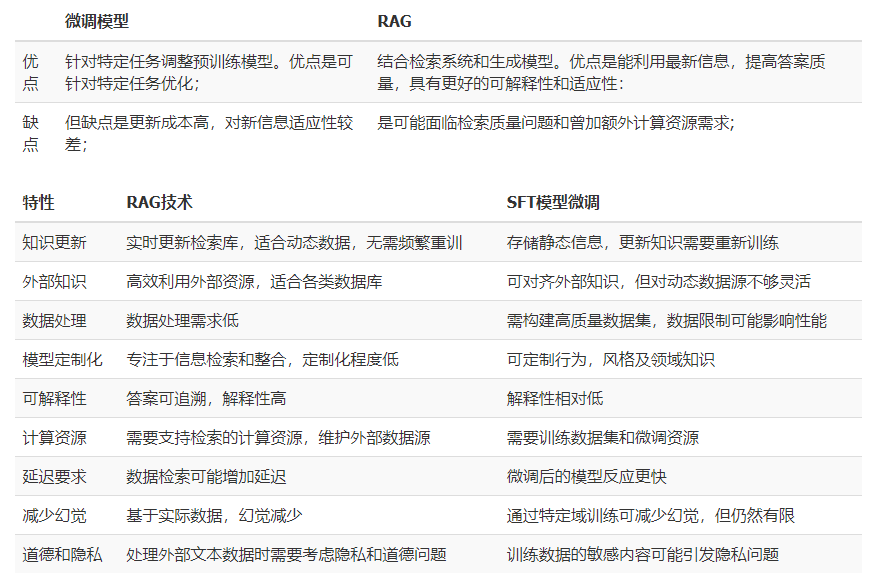

# 【✅内容完整】任务2：ChatGPT/GLM API使用

- 任务说明：了解ChatGPT/GLM API使用方法和逻辑
- 任务要求：
    - 能使用API进行对话
    - 能使用API进行文本嵌入
    - 能使用API进行function call
- 打卡要求：使用ChatGPT/GLM API分别完成对话、嵌入和function call，对比两个API的速度和完成效果。

In [1]:
import os
from dotenv import load_dotenv

load_dotenv()
api_key = os.getenv("ZHIPUAI_API_KEY")

api_key


'acf4f9247da5e232fbe056b14b35fd9b.uWW0WvWqwWUYjhzQ'

## 2.1 chatGLM 调用

In [2]:

import time
import jwt
import requests

# 鉴权
def generate_token(apikey: str, exp_seconds: int):
    try:
        id, secret = apikey.split(".")
    except Exception as e:
        raise Exception("invalid apikey", e)

    payload = {
        "api_key": id,
        "exp": int(round(time.time() * 1000)) + exp_seconds * 1000,
        "timestamp": int(round(time.time() * 1000)),
    }

    return jwt.encode(
        payload,
        secret,
        algorithm="HS256",
        headers={"alg": "HS256", "sign_type": "SIGN"},
    )
            

url = "https://open.bigmodel.cn/api/paas/v4/chat/completions"
headers = {
  'Content-Type': 'application/json',
  'Authorization': generate_token(api_key, 1000)
}

data = {
    "model": "glm-3-turbo",
    "messages": [{"role": "user", "content": """你好"""}]
}

response = requests.post(url, headers=headers, json=data)

print("Status Code", response.status_code)
print("JSON Response ", response.json())

Status Code 200
JSON Response  {'choices': [{'finish_reason': 'stop', 'index': 0, 'message': {'content': '你好👋！我是人工智能助手智谱清言（ChatGLM），很高兴见到你，欢迎问我任何问题。', 'role': 'assistant'}}], 'created': 1712732123, 'id': '8554702837937929063', 'model': 'glm-3-turbo', 'request_id': '8554702837937929063', 'usage': {'completion_tokens': 30, 'prompt_tokens': 6, 'total_tokens': 36}}


## 2.2 chatGLM embedding

In [4]:
url = "https://open.bigmodel.cn/api/paas/v4/embeddings"
    
    
headers = {
  'Content-Type': 'application/json',
  'Authorization': generate_token(api_key, 1000)
}

data = {
  "model": "embedding-2",
  "input": "测试文本，今天很开心。"
}

response = requests.post(url, headers=headers, json=data)

print("Status Code", response.status_code)
print("JSON Response ", response.json())

Status Code 200
JSON Response  {'data': [{'embedding': [-0.013840336352586746, 0.050973281264305115, -0.01606978476047516, -0.023173445835709572, 0.010980673134326935, -0.008409803733229637, -0.04177127033472061, -0.017274904996156693, 0.005274270661175251, 0.06778223812580109, 0.02828308753669262, 0.007300905883312225, 0.012086892500519753, 0.05264405906200409, -0.04144914820790291, -0.0107622304931283, 0.011162856593728065, 0.01041372213512659, 0.04429049789905548, -0.04369046911597252, 0.025944514200091362, 0.03629264608025551, 0.003921781666576862, -0.022125720977783203, -0.0015604185173287988, -0.05565837025642395, -0.03100697509944439, -0.01982254348695278, 0.01422557607293129, -0.03273096680641174, -0.008275809697806835, -0.016490569338202477, 0.0030155268032103777, 0.01925518549978733, -0.0043815188109874725, -0.00492432713508606, -0.01396256498992443, 0.027078552171587944, -0.04922840744256973, -0.018317289650440216, 0.030475277453660965, -0.034271568059921265, 0.0158528797328

## 2.3 chatGLM function call

In [5]:
url = "https://open.bigmodel.cn/api/paas/v4/chat/completions"
headers = {
  'Content-Type': 'application/json',
  'Authorization': generate_token(api_key, 1000)
}

data = {
    "model": "glm-3-turbo",
    "messages": [{"role": "user", "content": """你能帮我查询2024年4月9日从北京南站到上海的火车票吗？"""}],
    "tools":  [
        {
            "type": "function",
            "function": {
                "name": "query_train_info",
                "description": "根据用户提供的信息，查询对应的车次",
                "parameters": {
                    "type": "object",
                    "properties": {
                        "departure": {
                            "type": "string",
                            "description": "出发城市或车站",
                        },
                        "destination": {
                            "type": "string",
                            "description": "目的地城市或车站",
                        },
                        "date": {
                            "type": "string",
                            "description": "要查询的车次日期",
                        },
                    },
                    "required": ["departure", "destination", "date"],
                },
            }
        }
    ],
}

response = requests.post(url, headers=headers, json=data)

print("Status Code", response.status_code)
print("JSON Response ", response.json())

Status Code 200
JSON Response  {'choices': [{'finish_reason': 'tool_calls', 'index': 0, 'message': {'role': 'assistant', 'tool_calls': [{'function': {'arguments': '{"date":"2024-04-09","departure":"北京南站","destination":"上海"}', 'name': 'query_train_info'}, 'id': 'call_8554700260957566904', 'index': 0, 'type': 'function'}]}}], 'created': 1712649249, 'id': '8554700260957566904', 'model': 'glm-3-turbo', 'request_id': '8554700260957566904', 'usage': {'completion_tokens': 40, 'prompt_tokens': 233, 'total_tokens': 273}}


# 3. 读取汽车问答知识
- 任务说明：理解数据集背景和读取数据集
- 任务要求：
    - 下载数据集文件
    - 使用工具解析PDF内容
- 打卡要求：使用代码解析PDF文档内容，并能解析PDF内容

In [9]:
import json
import pdfplumber

questions = json.load(open('./dataset/questions.json', encoding='utf-8'))
print(questions[0])

pdf = pdfplumber.open('./dataset/初赛训练数据集.pdf')
print(len(pdf.pages))  # 页数
pdf.pages[0].extract_text()  # 初赛训练数据集.pdf


{'question': '“前排座椅通风”的相关内容在第几页？', 'answer': '', 'reference': ''}
354


'欢迎\n感谢您选择了具有优良安全性、舒适性、动力性和经济性的Lynk&Co领克汽车。\n首次使用前请仔细、完整地阅读本手册内容，将有助于您更好地了解和使用车辆。\n本手册中的所有资料均为出版时的最新资料，但本公司将对产品进行不断的改进和优化，您所购的车辆可能与本手册中的描述有所不同，请以实际\n接收的车辆为准。\n如您有任何问题，或需要预约服务，请拨打电话4006-010101联系我们。您也可以开车前往Lynk&Co领克中心。\n在抵达之前，请您注意驾车安全。\n©领克汽车销售有限公司'

> 读取所有页内容

In [11]:
pdf_content = []
for page_idx in range(len(pdf.pages)):
    pdf_content.append({
        'page': 'page_' + str(page_idx + 1),
        'content': pdf.pages[page_idx].extract_text()
    })

# 任务4：文本索引与答案检索
- 任务说明：文本文本索引的实现逻辑
- 任务要求：
    - 理解倒排索引
    - 实现TFIDF和BM25的编码与检索
- 打卡要求：使用TFIDF和BM25进行检索，使用question检索到答案的reference页面位置页面位置

> 文本检索流程索流程。


文本检索是一个多步骤的过程，其核心是构建倒排索引以实现高效的文本检索：

- 步骤1（文本预处理）：在文本预处理阶段，对原始文本进行清理和规范化，包括去除停用词、标点符号等噪声，并将文本统一转为小写。接着，采用词干化或词形还原等技术，将单词转换为基本形式，以减少词汇的多样性，为后续建立索引做准备。
  
* 步骤2（文本索引）：构建倒排索引是文本检索的关键步骤。通过对文档集合进行分词，得到每个文档的词项列表，并为每个词项构建倒排列表，记录包含该词项的文档及其位置信息。这种结构使得在查询时能够快速找到包含查询词的文档，为后续的文本检索奠定了基础。
+ 步骤3（文本检索）：接下来是查询处理阶段，用户查询经过预处理后，与建立的倒排索引进行匹配。计算查询中每个词项的权重，并利用检索算法（如TFIDF或BM25）对文档进行排序，将相关性较高的文档排在前面。
  
在实际应用中，倒排索引的构建和维护需要考虑性能问题，采用一些优化技术来提高检索效率，如压缩倒排索引、分布式索引等。这些步骤共同构成了一个有序而逻辑完整的文本检索流程。

> 文本检索与语义检索

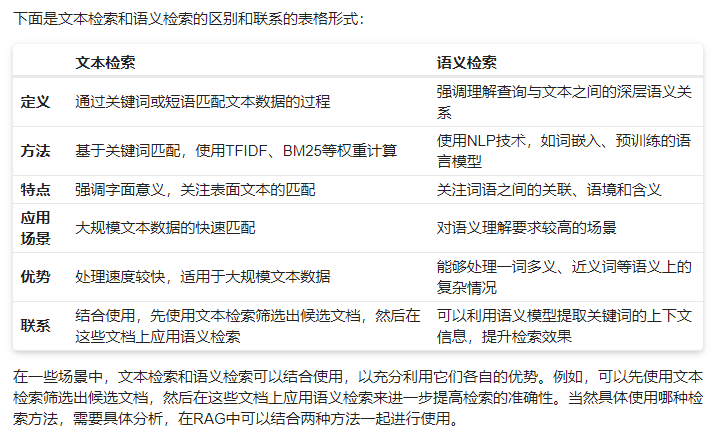|检索效果

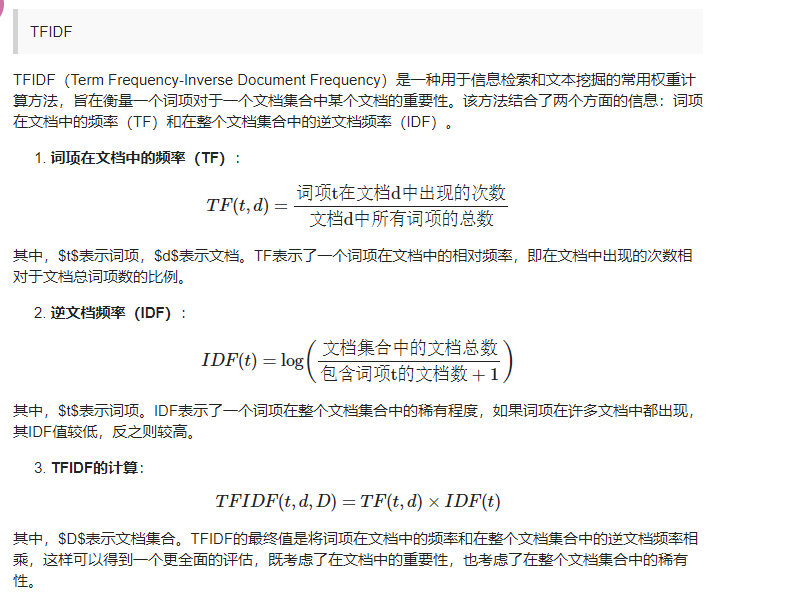


In [17]:
import jieba
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize

# 对提问和pdf内容进行分词
question_words = [' '.join(jieba.lcut(x['question'])) for x in questions]
pdf_content_words = [' '.join(jieba.lcut(x['content'])) for x in pdf_content]

tfidf = TfidfVectorizer()
tfidf.fit(question_words + pdf_content_words)

# 提取TFIDF
question_feat = tfidf.transform(question_words)
pdf_content_feat = tfidf.transform(pdf_content_words)

# 归一化
# 进行归一化
question_feat = normalize(question_feat)
pdf_content_feat = normalize(pdf_content_feat)



Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\HOUHAI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.512 seconds.
Prefix dict has been built successfully.


In [23]:

# 对检索进行排序
for query_idx, feat in enumerate(question_feat):
    score = feat @ pdf_content_feat.T
    score = score.toarray()[0]
    # argsort()函数的作用是将数组按照从小到大的顺序排序，并按照对应的索引值输出。
    # 找出score最大的索引，page_idx从1开始，这里需要+1
    max_score_page_idx = score.argsort()[-1] + 1
    questions[query_idx]['reference'] = 'page_' + str(max_score_page_idx)


# 生成提交结果
# https://competition.coggle.club/
with open('submit_tfidf.json', 'w', encoding='utf8') as up:
    json.dump(questions, up, ensure_ascii=False, indent=4)

> BM25

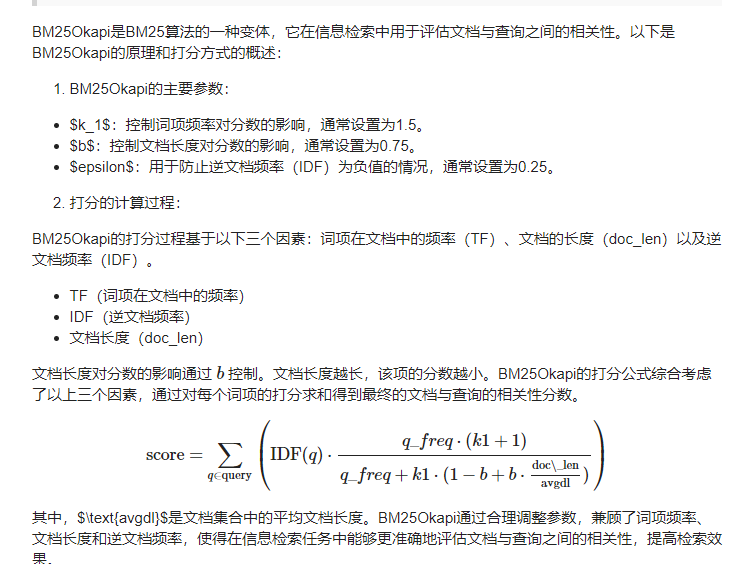

In [25]:
!pip install rank_bm25

from rank_bm25 import BM25Okapi

pdf_content_words = [jieba.lcut(x['content']) for x in pdf_content]
bm25 = BM25Okapi(pdf_content_words)

for query_idx in range(len(questions)):
    doc_scores = bm25.get_scores(jieba.lcut(questions[query_idx]["question"]))
    max_score_page_idx = doc_scores.argsort()[-1] + 1
    questions[query_idx]['reference'] = 'page_' + str(max_score_page_idx)

with open('submit_bm25.json', 'w', encoding='utf8') as up:
    json.dump(questions, up, ensure_ascii=False, indent=4)

# 任务5：文本嵌入与向量检索检索结果

- 任务说明：对文本进行编码，并进行语义检索
- 任务要求：
    - 加载文本编码模型
    - 对提问和文档进行编码，并进行检索
- 打卡要求：加载三个编码模型，计算检索结果

- M3E文本编码模型

In [28]:
# pip install sentence_transformers

from sentence_transformers import SentenceTransformer
model = SentenceTransformer('../hugging-face-model/moka-ai/m3e-small/')

question_sentences = [x['question'] for x in questions]
pdf_content_sentences = [x['content'] for x in pdf_content]

print(len(question_sentences))
print(len(pdf_content_sentences))

question_embeddings = model.encode(question_sentences, normalize_embeddings=True)
pdf_embeddings = model.encode(pdf_content_sentences, normalize_embeddings=True)

print(question_embeddings.shape)
print(pdf_embeddings.shape)

for query_idx, feat in enumerate(question_embeddings):
    score = feat @ pdf_embeddings.T
    max_score_page_idx = score.argsort()[-1] + 1
    questions[query_idx]['reference'] = 'page_' + str(max_score_page_idx)

with open('submit.json', 'w', encoding='utf8') as up:
    json.dump(questions, up, ensure_ascii=False, indent=4)

ValueError: Path ../hugging-face-model/moka-ai/m3e-small/ not found